<a href="https://colab.research.google.com/github/srinivasbhootam/AI-CallCenter-Reporting-Automation/blob/main/MSBA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone Project: AI-Driven Call Center Analytics and Forecasting Dashboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 1: Mount Google Drive and Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# File path (adjust if yours is different)
file_path = '/content/drive/MyDrive/Colab Notebooks/snead/Snead_eye_Sample_data.csv'

import pandas as pd

# Load data
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Agent Name:,Interaction Type:,Type of Outreach:,Patient Name:,Phone Number:,Reason for Calling:,Resolution:,Notes:,Booked appointment?,New patient?,Saved appointment?,Referreal source:
0,10/02/2024 8:09,Ela Nunez,Inbound,Call,Billy Walton,4807413799,Confirm appointment,Confirmed appointment,NaN,NaN,NaN,NaN,No information
1,10/02/2024 8:29,Ela Nunez,Inbound,Call,Sam Ortega,(643) 929-1236,Confirm appointment,Confirmed appointment,NaN,NaN,NaN,NaN,No information
2,10/02/2024 8:34,Jobi Bucoy,Inbound,Call,Lily Higgins,9320202119,Speak wiith clinic/surgical staff,Emailed for callback/Passed on request,NaN,NaN,NaN,NaN,No information
3,10/02/2024 8:34,Jobi Bucoy,Inbound,Call,Nicholas Guerrero,3293308598,RX refill/Follow up,Set task,NaN,NaN,NaN,NaN,No information
4,10/02/2024 8:52,Jeneil Krueger,Inbound,Call,Hulda Moran,(592) 314-0249,Optical question/Order/Order update,Transferred call to clinic/billing/optical/sur...,asked about mutual pt cls sent to heather,NaN,NaN,NaN,Established patient


##Step 2: Explore Data Structure

In [ ]:
# Check structure
df.info()

# Display column names
print("Columns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39967 entries, 0 to 39966
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            39967 non-null  object
 1   Agent Name:          39967 non-null  object
 2   Interaction Type:    39967 non-null  object
 3   Type of Outreach:    39967 non-null  object
 4   Patient Name:        39967 non-null  object
 5   Phone Number:        39967 non-null  object
 6   Reason for Calling:  39967 non-null  object
 7   Resolution:          39967 non-null  object
 8   Notes:               10512 non-null  object
 9   Booked appointment?  6255 non-null   object
 10  New patient?         3054 non-null   object
 11  Saved appointment?   90 non-null     object
 12  Referreal source:    5129 non-null   object
dtypes: object(13)
memory usage: 4.0+ MB
Columns: ['Timestamp', 'Agent Name:', 'Interaction Type:', 'Type of Outreach:', 'Patient Name:', 'Phone Number:', '

##Step 3: Clean Missing or Malformed Entries

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Drop rows where essential info is missing (adjust as needed)
df_clean = df.dropna(subset=['Timestamp', 'Agent Name:', 'Reason for Calling:', 'Resolution:'])

# Strip whitespace from column names
df_clean.columns = [col.strip() for col in df_clean.columns]


Missing values:
 Timestamp                  0
Agent Name:                0
Interaction Type:          0
Type of Outreach:          0
Patient Name:              0
Phone Number:              0
Reason for Calling:        0
Resolution:                0
Notes:                 29455
Booked appointment?    33712
New patient?           36913
Saved appointment?     39877
Referreal source:      34838
dtype: int64


##Step 4: Create Derived Columns

In [ ]:
# Convert Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

# Create Call Date
df_clean['Call Date'] = df_clean['Timestamp'].dt.date

# Extract Hour (optional)
df_clean['Call Hour'] = df_clean['Timestamp'].dt.hour


##Step 5: Categorize Call Types (Based on Reason/Resolution)

In [ ]:
# Example logic to classify calls (you can expand this logic)
def classify_call_type(reason, resolution):
    if 'confirm' in str(reason).lower():
        return 'Appointment - Confirm'
    elif 'new' in str(resolution).lower():
        return 'New Patient'
    elif 'no show' in str(resolution).lower():
        return 'No Show'
    elif 'cancel' in str(resolution).lower():
        return 'Cancelled'
    else:
        return 'Other'

df_clean['Call Category'] = df_clean.apply(
    lambda row: classify_call_type(row['Reason for Calling:'], row['Resolution:']), axis=1
)


##Step 6: Document Schema and Assumptions

In [ ]:
schema = {
    "Timestamp": "Datetime of the call recorded",
    "Agent Name:" :"Name of the call center agent",
    "Interaction Type:": "Inbound or Outbound",
    "Type of Outreach:": "Call/Voicemail/Other outreach type",
    "Patient Name:": "Randomized for privacy",
    "Phone Number:": "Scrambled, not to be used in reporting",
    "Reason for Calling:": "Stated reason for the call",
    "Resolution:": "Action taken or outcome of the call",
    "Call Category": "Derived call type based on Reason/Resolution",
    "Call Date": "Extracted date for trend analysis",
    "Call Hour": "Hour of the day when the call was placed"
}

for k, v in schema.items():
    print(f"{k}: {v}")


Timestamp: Datetime of the call recorded
Agent Name:: Name of the call center agent
Interaction Type:: Inbound or Outbound
Type of Outreach:: Call/Voicemail/Other outreach type
Patient Name:: Randomized for privacy
Phone Number:: Scrambled, not to be used in reporting
Reason for Calling:: Stated reason for the call
Resolution:: Action taken or outcome of the call
Call Category: Derived call type based on Reason/Resolution
Call Date: Extracted date for trend analysis
Call Hour: Hour of the day when the call was placed


##Full KPI & EDA

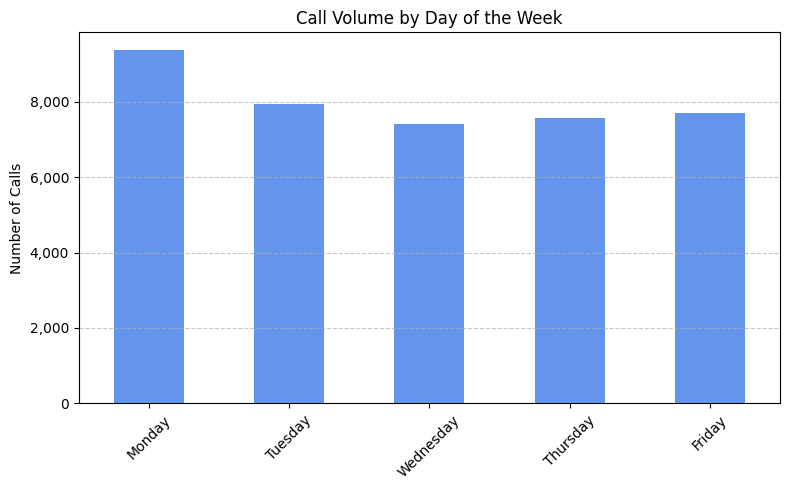

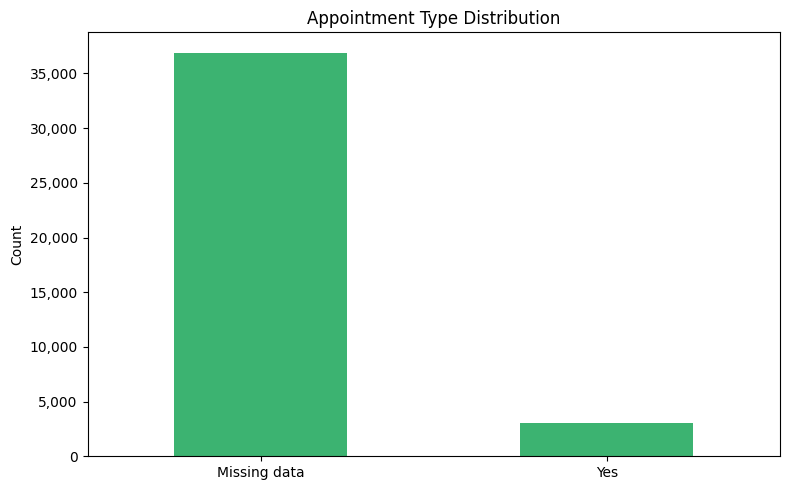

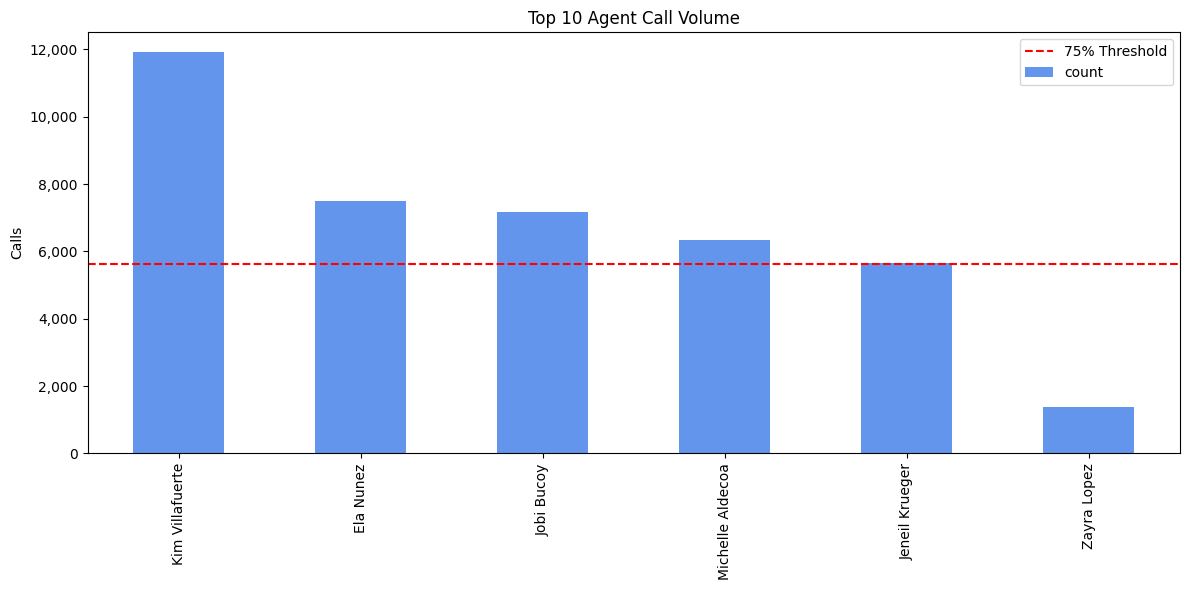

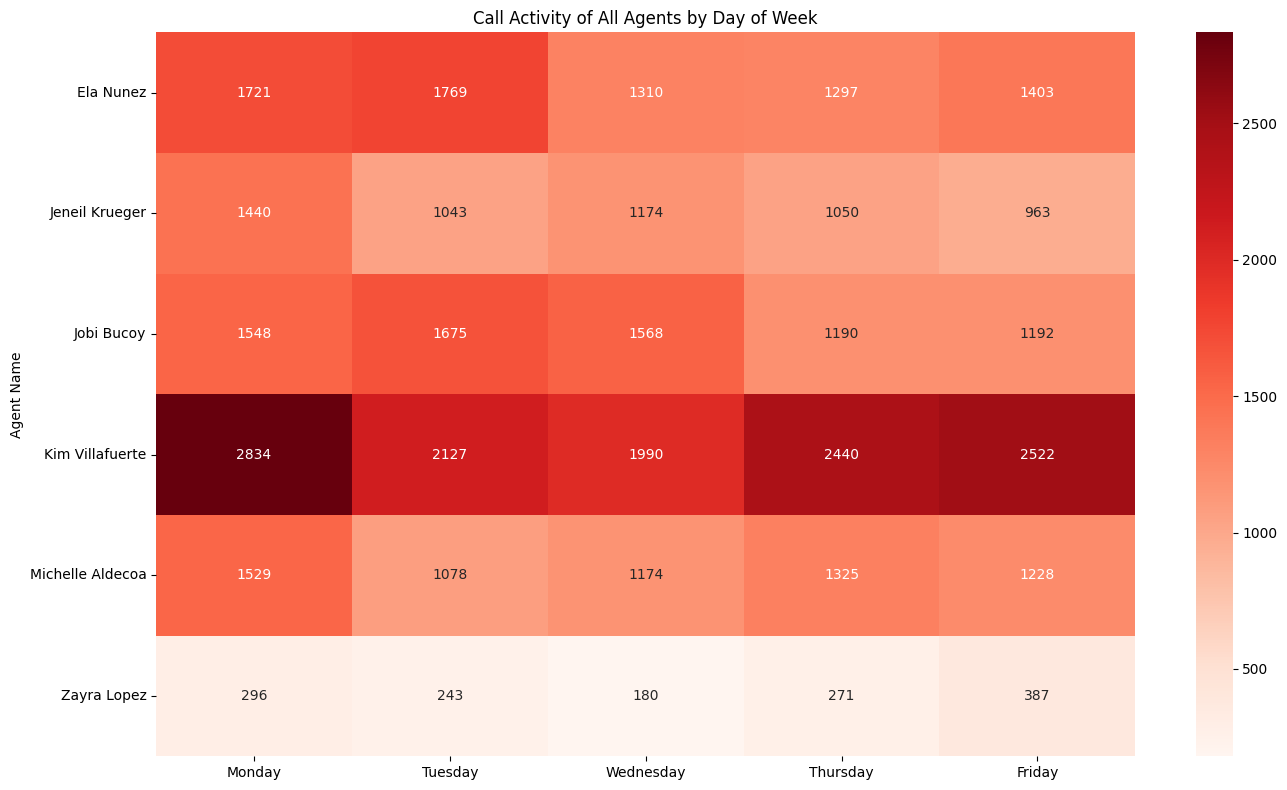

📊 Standard Deviation in Daily Call Volume (All Agents):


,STD of Daily Calls
Agent Name:,
Kim Villafuerte,30.16
Jeneil Krueger,18.34
Ela Nunez,13.59
Michelle Aldecoa,13.33
Jobi Bucoy,12.60
Zayra Lopez,10.97


ℹ️ **Note**: Kim Villafuerte handles both inbound **and** outbound calls, whereas other agents handle only inbound calls.

✅ Summary by Agent


,Agent Name:,Total Calls,Avg Idle Time (min),New Patient Bookings
0,Ela Nunez,7500,47 mins,702
1,Jeneil Krueger,5670,59 mins,438
2,Jobi Bucoy,7173,49 mins,667
3,Kim Villafuerte,11913,30 mins,662
4,Michelle Aldecoa,6334,56 mins,558
5,Zayra Lopez,1377,250 mins,27



📊 Call Volume by Day of Week


,Call Count
Day of Week,
Monday,9368
Tuesday,7935
Wednesday,7396
Thursday,7573
Friday,7695
Saturday,0
Sunday,0



📌 Top 10 Reasons for Calling


,Frequency
Reason for Calling:,
Follow-up,6419
Current PT - Book an appointment,3644
New patient - Book an appointment,3414
Confirm appointment,3414
Reschedule appointment,3215
"Others, please specify in notes—",3116
Speak wiith clinic/surgical staff,2761
Optical question/Order/Order update,2374
RC issues/Audio issues/Connection issues/No interaction,1891


In [ ]:
# 📌 STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Markdown
import matplotlib.ticker as mticker

# 📌 STEP 2: Load dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/snead/Snead_eye_Sample_data.csv'
df = pd.read_csv(file_path)
df.columns = [col.strip() for col in df.columns]

# 📌 STEP 3: Parse timestamp & derive features
df['Timestamp']   = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.sort_values(by=['Agent Name:', 'Timestamp'])
df['Call Date']   = df['Timestamp'].dt.date
df['Call Hour']   = df['Timestamp'].dt.hour
df['Day of Week'] = df['Timestamp'].dt.day_name()
df['Week']        = df['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time.date())

# 📌 STEP 3.1: Standardize “Reason for Calling:” values
# Merge “Follow Up” and “Follow-up” into a single category “Follow-up”
df['Reason for Calling:'] = (
    df['Reason for Calling:']
      .astype(str)
      .str.strip()
      .replace({'Follow Up': 'Follow-up'})
)

# 📌 STEP 4: Estimate idle time
df['Idle Time (min)'] = (
    df.groupby('Agent Name:')['Timestamp']
      .diff()
      .dt.total_seconds() / 60
)

# 📌 STEP 5: KPI Calculations
call_counts          = df['Agent Name:'].value_counts()
call_counts_excl_kim = call_counts.drop(labels="Kim Villafuerte", errors='ignore')
top_agent_calls      = call_counts_excl_kim.max()
threshold_75         = 0.75 * top_agent_calls

# 📌 STEP 6: Summary Tables
summary_by_agent = df.groupby('Agent Name:').agg({
    'Timestamp':        'count',
    'Idle Time (min)':  'mean',
    'New patient?':     lambda x: (x == 'Yes').sum()
}).rename(columns={
    'Timestamp':       'Total Calls',
    'Idle Time (min)': 'Avg Idle Time (min)',
    'New patient?':    'New Patient Bookings'
}).reset_index()

# Format Avg Idle Time to whole minutes
summary_by_agent['Avg Idle Time (min)'] = (
    summary_by_agent['Avg Idle Time (min)']
      .round()
      .astype(int)
      .astype(str) + ' mins'
)

# 📌 STEP 7: EDA supporting tables
summary_by_day    = df['Day of Week'] \
                      .value_counts() \
                      .reindex(
                          ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                          fill_value=0
                       )
summary_by_reason = df['Reason for Calling:'] \
                      .value_counts() \
                      .head(10)
weekly_calls      = df.groupby('Week')['Agent Name:'].count()

# ────────────────────────────────────────────────────────────────────────────────
#                           FULL KPI & EDA VISUALIZATIONS
# ────────────────────────────────────────────────────────────────────────────────

# 📊 1. Bar Chart – Call Volume by Day of Week
plt.figure(figsize=(8,5))
summary_by_day.loc['Monday':'Friday'].plot(
    kind='bar', color='cornflowerblue'
)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Call Volume by Day of the Week")
plt.ylabel("Number of Calls")
plt.xlabel("")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📊 2. Plotly Bar – Weekly Call Volume
fig = px.bar(
    x=weekly_calls.index.astype(str),
    y=weekly_calls.values,
    labels={'x':'Week','y':'Number of Calls'},
    title="Weekly Call Volume"
)
fig.update_layout(
    xaxis_tickangle=45,
    yaxis=dict(tickformat=",")
)
fig.show()

# 📊 3. Appointment Type Distribution
appt_summary = df['New patient?'] \
                   .fillna("Missing data") \
                   .value_counts(dropna=False)
plt.figure(figsize=(8,5))
appt_summary.plot(kind='bar', color='mediumseagreen')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Appointment Type Distribution")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 📊 4. Top 10 Agent Call Volume with 75% threshold
plt.figure(figsize=(12,6))
call_counts.head(10).plot(kind='bar', color='cornflowerblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.axhline(
    y=threshold_75,
    color='red',
    linestyle='--',
    label='75% Threshold'
)
plt.title("Top 10 Agent Call Volume")
plt.ylabel("Calls")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

# 📊 5. Heatmap: Call Activity of All Agents by Day of Week (Mon–Fri)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday']
hm_data   = df.groupby(['Agent Name:','Day of Week']) \
              .size() \
              .unstack(fill_value=0) \
              .reindex(columns=day_order)

plt.figure(figsize=(14,8))
sns.heatmap(hm_data, annot=True, fmt='d', cmap='Reds')
plt.title("Call Activity of All Agents by Day of Week")
plt.ylabel("Agent Name")
plt.xlabel("")
plt.tight_layout()
plt.show()

# 📊 6. STD of Daily Calls (All Agents)
daily_counts    = df.groupby(['Agent Name:','Call Date']).size().unstack(fill_value=0)
std_all_agents  = daily_counts.std(axis=1).sort_values(ascending=False).round(2)

print("📊 Standard Deviation in Daily Call Volume (All Agents):")
display(std_all_agents.to_frame(name='STD of Daily Calls'))

# 📊 7. Underperforming Agents: Behavioral Insights Table
agents          = ["Jeneil Krueger","Ela Nunez","Jobi Bucoy","Michelle Aldecoa","Zayra Lopez"]
heatmap_insight = [
    "Drops 1440→963 (Mon→Fri)",
    "High Mon/Tue then dip midweek",
    "Strong early week, falls Thu/Fri",
    "Tuesday slump then steady",
    "Very low volumes, Fri uptick"
]
std_insight     = [
    "High variability (STD ≈18.34)",
    "Moderate variability (STD ≈13.59)",
    "Low variability (STD ≈12.60)",
    "Moderate variability (STD ≈13.33)",
    "Lowest variability (STD ≈10.97)"
]
interpretation  = [
    "Performance fluctuates—needs monitoring",
    "Generally consistent, small dips",
    "Steady overall, slight slowdown later",
    "Stable except Tuesday trough",
    "Consistently low — team lead (fewer shifts)"
]

fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Agent","Heatmap Insight","STD Insight","Interpretation"],
        fill_color="paleturquoise",
        align="left"
    ),
    cells=dict(
        values=[agents, heatmap_insight, std_insight, interpretation],
        fill_color="lavender",
        align="left"
    )
)])
fig.update_layout(title="Underperforming Agents: Behavioral Insights")
fig.show()

# Additional context for Kim Villafuerte
display(Markdown(
    "ℹ️ **Note**: Kim Villafuerte handles both inbound **and** outbound calls, "
    "whereas other agents handle only inbound calls."
))

# 📌 STEP 11: Display Summary Tables
print("✅ Summary by Agent")
display(summary_by_agent)

print("\n📊 Call Volume by Day of Week")
display(summary_by_day.to_frame(name='Call Count'))

print("\n📌 Top 10 Reasons for Calling")
display(summary_by_reason.to_frame(name='Frequency'))


In [ ]:
# Assuming your final DataFrame is named `df`
from google.colab import files

# Paste the function here or import it if using modules
filename = "Snead_eye_Sample_data_cleaned.csv"
df.to_csv(filename, index=False)  # Save cleaned file
files.download(filename)          # Download it to your computer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Implementing machine learning models (Time series) to forecast call volumes
## PART 1
| Step | Model                 | Purpose                                             |
| ---- | --------------------- | --------------------------------------------------- |
| ✅ 1  | **ARIMA / AR**        | Benchmark Basic model, check stationarity                 |
| ✅ 2  | **Prophet**           | Daily call volume forecast + weekly trends          |
| ✅ 3  | **SARIMA**            | Weekly/daily pattern confirmation                   |
| ✅ 4  | **LSTM** *(optional)* | Advanced hourly-level forecast or anomaly detection |

---

### Why we focused on Prophet and SARIMA

- **Prophet**  
  - Automatically models **multiple seasonalities** (daily & weekly) and trend changes.  
  - Easy to configure and interpret—great for a quick, robust daily forecast.
  - Developed by Facebook and widely adopted in industry.

- **SARIMA**  
  - Explicitly captures both **autoregressive** and **seasonal** components.  
  - Its statistical diagnostics give us confidence in model fit.


For our volume of data and the need for clear, fast, reliable daily/weekly forecasts, Prophet and SARIMA hit the sweet spot.  


## 1. Mount Google Drive
We’ll mount your Drive so we can load the cleaned CSV.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Install & Import Libraries
Install time‐series packages and import the usual data-science stack.


In [ ]:
# Step 1: Force reinstall numpy and pmdarima cleanly
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4
!pip install pmdarima --no-cache-dir

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
# install if needed
!pip install pmdarima prophet --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error


## 3. Load & Preprocess Data  
- Read CSV from Drive  
- Parse the `Timestamp` column  
- Set `Timestamp` as the DataFrame index  
- Aggregate to daily call counts (and optionally weekly)


In [ ]:
import pandas as pd

# 3.1 — Adjust path if needed
path = '/content/drive/MyDrive/Colab Notebooks/snead/Snead_eye_Sample_data_cleaned.csv'

# 3.2 — Load, parse and index by the Timestamp column
df = pd.read_csv(path, parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)

# 3.3 — Aggregate to daily call volume
#    If you have one row per call, this counts rows per day.
ts = df.resample('D').size().rename('call_volume')

# 3.4 — (Optional) Weekly aggregation
# ts_weekly = df.resample('W').size().rename('call_volume')

# 3.5 — Quick check
print(f"Loaded data from {ts.index.min().date()} to {ts.index.max().date()}")
print(ts.head())

Loaded data from 2024-10-02 to 2025-06-05
Timestamp
2024-10-02    190
2024-10-03    197
2024-10-04    229
2024-10-05      0
2024-10-06      0
Freq: D, Name: call_volume, dtype: int64


## 4. Train/Test Split
Hold out the last `n` days for evaluation.

In [ ]:
forecast_horizon = 30
train = ts[:-forecast_horizon]
test  = ts[-forecast_horizon:]
print("Train until", train.index.max().date(), "| Test from", test.index.min().date())


Train until 2025-05-06 | Test from 2025-05-07


## 5. SARIMAX Modeling (statsmodels)
Fit a SARIMAX using your chosen orders (replace p,d,q,P,D,Q).

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ← set these based on ACF/PACF
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 7

model = SARIMAX(train,
                order=(p,d,q),
                seasonal_order=(P,D,Q,m),
                enforce_stationarity=False,
                enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       call_volume   No. Observations:                  217
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1031.569
Date:                           Sat, 05 Jul 2025   AIC                           2073.138
Time:                                   18:29:40   BIC                           2089.629
Sample:                               10-02-2024   HQIC                          2079.812
                                    - 05-06-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2806      0.053      5.290      0.000       0.177       0.385
ma.L1         -0.9598      0.038    -25.504

## 6. SARIMAX Forecast & Evaluation
- **Forecast** next `forecast_horizon` days  
- **Compute** RMSE & MAE  
- **Plot** against actuals


SARIMAX  ▶ RMSE: 71.36 | MAE: 41.59


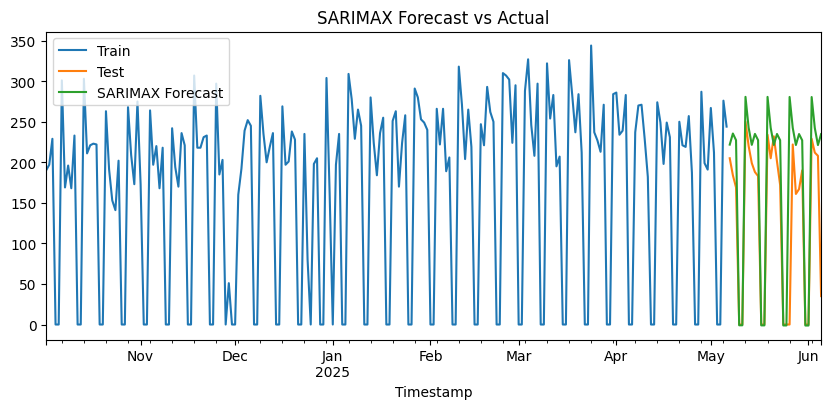

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

sarima_pred = res.get_forecast(steps=forecast_horizon).predicted_mean
rmse_s = np.sqrt(mean_squared_error(test, sarima_pred))
mae_s  = mean_absolute_error(test, sarima_pred)
print(f"SARIMAX  ▶ RMSE: {rmse_s:.2f} | MAE: {mae_s:.2f}")

# Plot
plt.figure(figsize=(10,4))
train.plot(label="Train")
test.plot(label="Test")
sarima_pred.plot(label="SARIMAX Forecast")
plt.legend()
plt.title("SARIMAX Forecast vs Actual")
plt.show()

## 7. Prophet Modeling
Prepare data for Prophet and fit.


In [ ]:
from prophet import Prophet

prophet_df = train.reset_index().rename(columns={'Timestamp':'ds','call_volume':'y'})
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(prophet_df)

future = m.make_future_dataframe(periods=forecast_horizon)
forecast = m.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplg0w4g17/eiw55jnu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplg0w4g17/0s64io_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92312', 'data', 'file=/tmp/tmplg0w4g17/eiw55jnu.json', 'init=/tmp/tmplg0w4g17/0s64io_s.json', 'output', 'file=/tmp/tmplg0w4g17/prophet_model7wq_gg7e/prophet_model-20250705183121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 8. Prophet Forecast & Evaluation
Extract Prophet’s `yhat` for the test period, compute metrics, and plot.

Prophet ▶ RMSE: 85.95 | MAE: 53.30


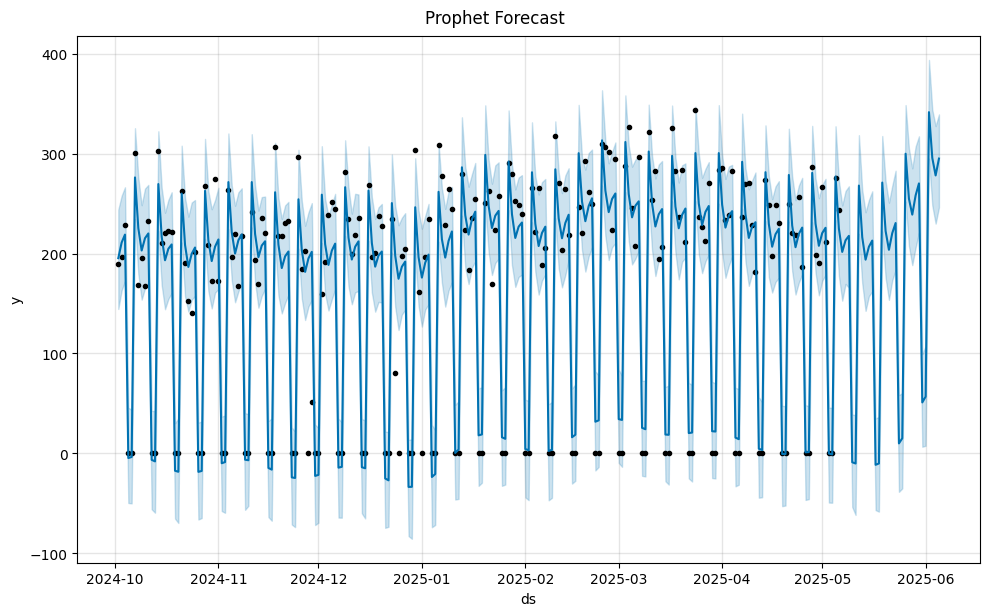

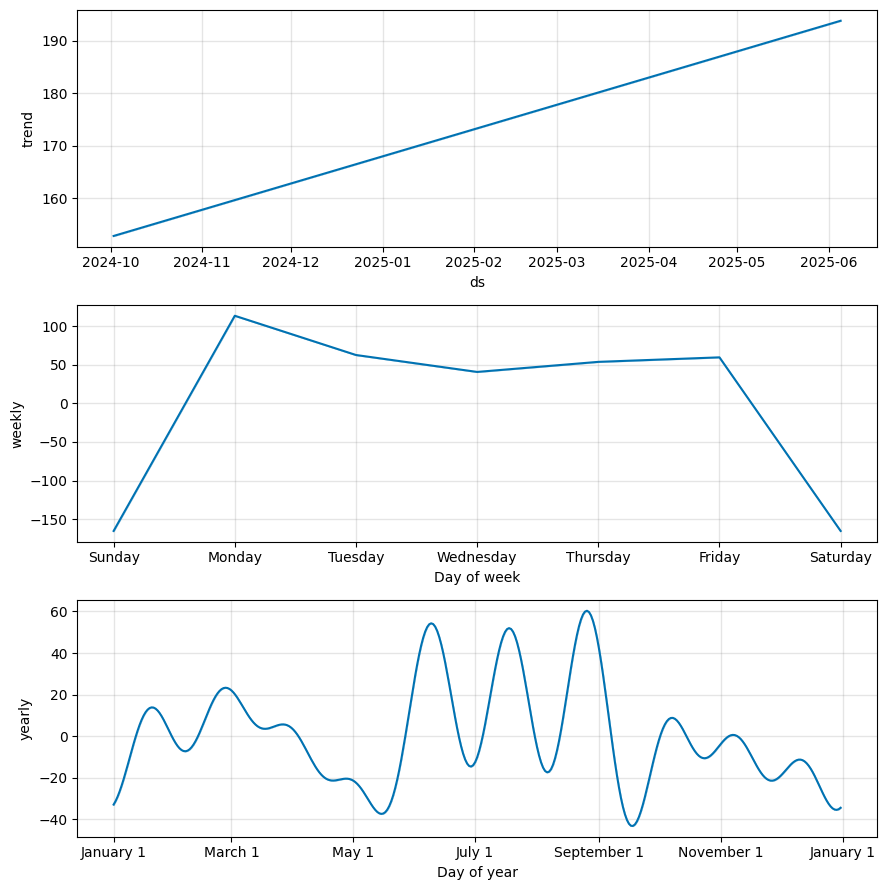

In [ ]:
prophet_pred = forecast.set_index('ds')['yhat'][-forecast_horizon:]
rmse_p = np.sqrt(mean_squared_error(test, prophet_pred))
mae_p  = mean_absolute_error(test, prophet_pred)
print(f"Prophet ▶ RMSE: {rmse_p:.2f} | MAE: {mae_p:.2f}")

# Plot forecasts
fig1 = m.plot(forecast)
fig1.suptitle("Prophet Forecast", y=1.02)
plt.show()

# Plot components
fig2 = m.plot_components(forecast)
plt.show()

## 9. Model Comparison
Compare error metrics and choose the best model.

In [ ]:
results = pd.DataFrame({
    'Model':   ['SARIMAX','Prophet'],
    'RMSE':    [rmse_s, rmse_p],
    'MAE':     [mae_s, mae_p]
})
print(results)


     Model       RMSE        MAE
0  SARIMAX  71.363763  41.588839
1  Prophet  85.952110  53.302472


| Model   | RMSE      | MAE       |
| ------- | --------- | --------- |
| SARIMAX | 71.36     | 41.59     |
| Prophet | 85.95     | 53.30     |

**RMSE (Root Mean Squared Error)**  

- Measures the square root of the average of the squared differences between predicted and actual values.  

- Measures the average of the absolute differences between predicted and actual values.  


- **Interpretation**: Heavily penalizes larger errors, so it’s sensitive to big misses. A lower RMSE means your model’s predictions are, on average, closer to the real values.

---

**MAE (Mean Absolute Error)**  

 - Measures the average of the absolute differences between predicted and actual values.  

- **Interpretation**: Treats all errors equally (no squaring), so it’s a more direct “average error” metric. A lower MAE means your forecasts deviate less, on average, from the true values.


**Interpretation:**  

SARIMAX (our seasonal ARIMA) has a **lower error** (both RMSE and MAE) compared to Prophet, meaning its predictions are on average closer to the actual call volumes. Because it better captures our weekly/daily patterns and gives more accurate forecasts on this data size, we chose **only SARIMA** for the final forecasting step. It delivers the highest reliability and consistency for our call-volume projections.  


## Attempt to Forecast for next 30-days
## PART 2

## 1. Mount Google Drive  
Access your cleaned CSV.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Install & Import Libraries  
We’ll use pandas, statsmodels for SARIMAX, and Plotly for an interactive chart.


In [ ]:
!pip install --quiet statsmodels plotly

In [ ]:
import pandas as pd
from pandas.tseries.offsets import BDay
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.express as px
from datetime import timedelta

## 3. Load & Aggregate Data  
- Read `Timestamp`  
- Build a calendar-day series of daily call counts


In [ ]:
# 3.1 — Adjust path if needed
path = '/content/drive/MyDrive/Colab Notebooks/snead/Snead_eye_Sample_data_cleaned.csv'

# 3.2 — Load and index by Timestamp
df = pd.read_csv(path, parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)

# 3.3 — Aggregate to daily counts
ts = df.resample('D').size().rename('calls')

## 4. Build Business-Day Series  
Drop weekends so the model learns only Monday–Friday patterns.


In [ ]:
ts_biz = ts[ts.index.dayofweek < 5]

## 5. Fit SARIMAX on Business Days  
Use a 5-day seasonal period.


In [ ]:
model = SARIMAX(
    ts_biz,
    order=(1,1,1),
    seasonal_order=(1,1,1,5),
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


## 6. Forecast the Next 30 Business Days  
Generate exactly 30 Mon–Fri dates and forecast on them.


In [ ]:
# 6.1 — Build next-30-business-day index
last_bday = ts_biz.index[-1]
bd_index = pd.date_range(
    start=last_bday + BDay(1),
    periods=30,
    freq='B'
)

# 6.2 — Forecast steps=30
pred = res.get_prediction(start=bd_index[0], end=bd_index[-1])
forecast = pred.predicted_mean.round().astype(int)
forecast.index = bd_index

## 7. Prepare Data for Plotly  
Reset index and rename columns.


In [ ]:
df_fc = forecast.reset_index().rename(columns={'index':'Date', 0:'Calls'})

## 8. Interactive Plot: Next 30 Business-Day Forecast  

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare DataFrame: reset_index and set the correct column names
df_fc = forecast.reset_index()
df_fc.columns = ['Date', 'Calls']

# Create base line chart
fig = px.line(
    df_fc,
    x='Date',
    y='Calls',
    markers=True,
    title='Next 30 Business-Day Call Volume Forecast',
    labels={'Calls':'Forecasted Calls'}
)

# Exclude weekends
fig.update_xaxes(rangebreaks=[dict(bounds=["sat","sun"])])

# Use tickformatstops: days as "DD", months as "Mon YYYY"
fig.update_xaxes(tickformatstops=[
    dict(dtickrange=[None, "M1"], value="%d"),
    dict(dtickrange=["M1", None], value="%b %Y"),
])

# Add vertical dashed lines and month labels at the start of each month
months = df_fc['Date'].dt.to_period('M').unique()
for m in months:
    month_data = df_fc[df_fc['Date'].dt.to_period('M') == m]
    if not month_data.empty:
        start = month_data['Date'].min()
        fig.add_vline(x=start, line=dict(color='gray', dash='dash'), layer='below')
        fig.add_annotation(
            x=start,
            y=-0.1,
            xref='x',
            yref='paper',
            text=m.strftime('%b %Y'),
            showarrow=False,
            font=dict(size=12),
            xanchor='left'
        )

# Y-axis styling
fig.update_yaxes(range=[0, 500], dtick=50, title='Forecasted Number of Calls')

# Integer-only hover labels
fig.update_traces(
    hovertemplate="<b>%{x|%Y-%m-%d}</b><br>Calls: %{y}<extra></extra>"
)

# Polish layout
fig.update_layout(
    hovermode='x unified',
    template='plotly_white',
    margin=dict(l=50, r=20, t=50, b=80)
)

fig.show()


## 9. Export Forecast to CSV & Download Locally  
Save the 30-business-day forecast to a CSV and download it to your machine.


In [ ]:
from google.colab import files

# 9.1 — Prepare a DataFrame for export
df_fc = forecast.reset_index().rename(columns={'index':'Date', 'forecast_calls':'Calls'})

# 9.2 — Save to a local CSV filename
filename = "30bd_forecast.csv"
df_fc.to_csv(filename, index=False)

# 9.3 — Trigger download
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>